# **Huber Regressor**


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

##Importación de los datos
data = pd.read_csv('datos_caso_3.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


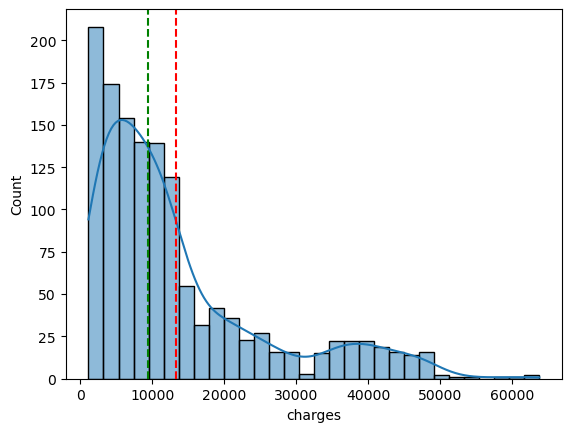

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.histplot(data=data, x='charges', kde=True)
plt.axvline(x=data.charges.mean(), color='red', linestyle= 'dashed')
plt.axvline(x=data.charges.median(), color='green', linestyle='dashed')
plt.show()
#QUEEEEEE
#NOU NORMAL 
#APLICATION DE LEY DE LOS GRANDES NUMEROS 

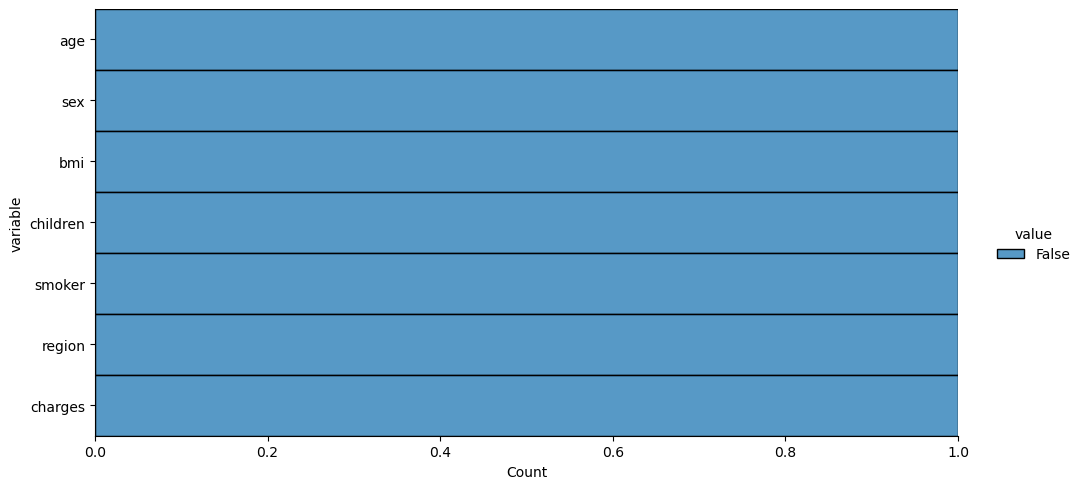

In [5]:
#datos nulos
data.isnull().melt().pipe(lambda df: sb.displot(data=df, y='variable', hue='value',multiple='fill',aspect=2))
plt.show()   

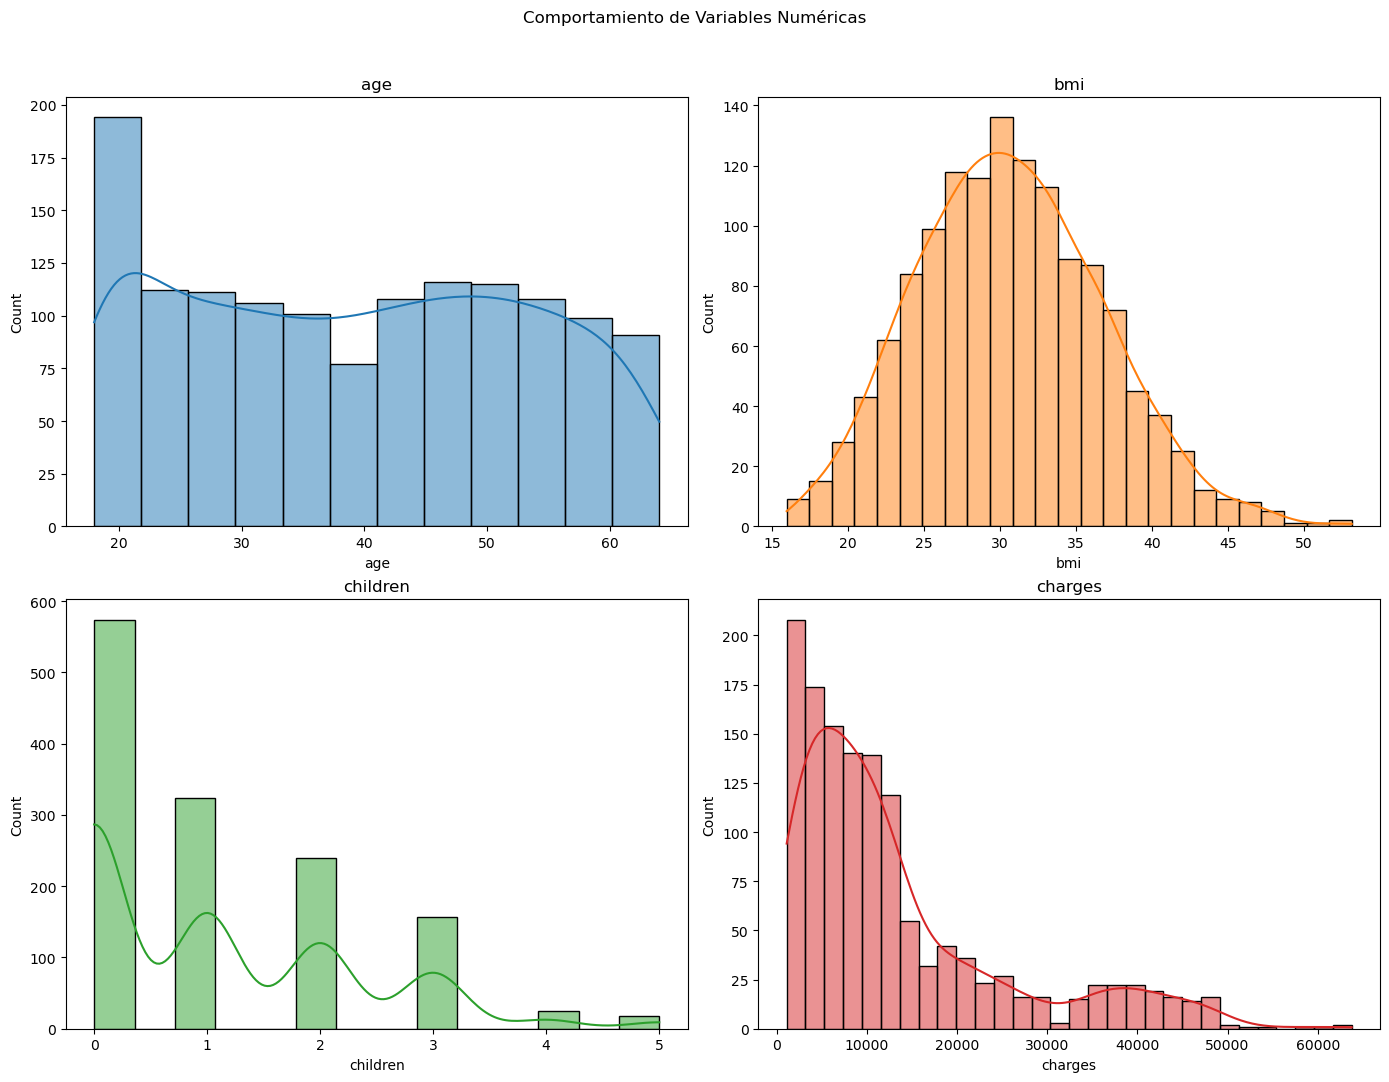

In [6]:
#histograma de frecuencias variables númericas 
fig, ax = plt.subplots(2,2, figsize=(14,11))
ax = ax.flat
num_col=data.select_dtypes(include=['int64','float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = data, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()

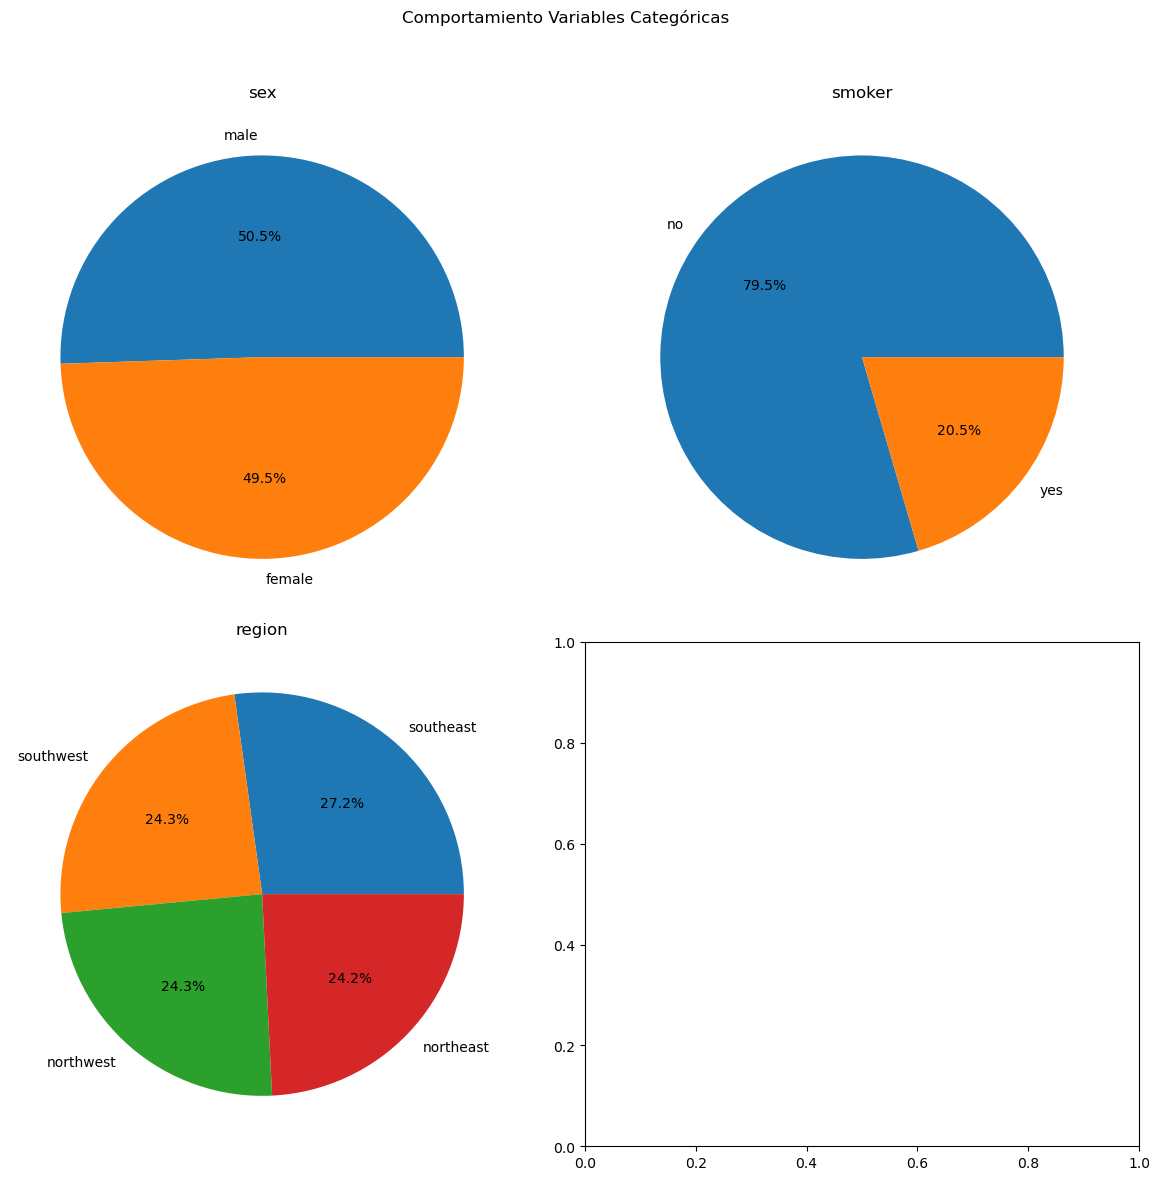

In [7]:
##GRÁFICOS DE TORTA
fig, ax = plt.subplots(2, 2, figsize = (12, 12))
ax = ax.flat
cat_col = data.select_dtypes(include = ['object']).columns
for i, col in enumerate(cat_col):
    ax[i].pie(x = data[col].value_counts(), labels = data[col].value_counts().index, autopct = '%0.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Comportamiento Variables Categóricas")
plt.show()

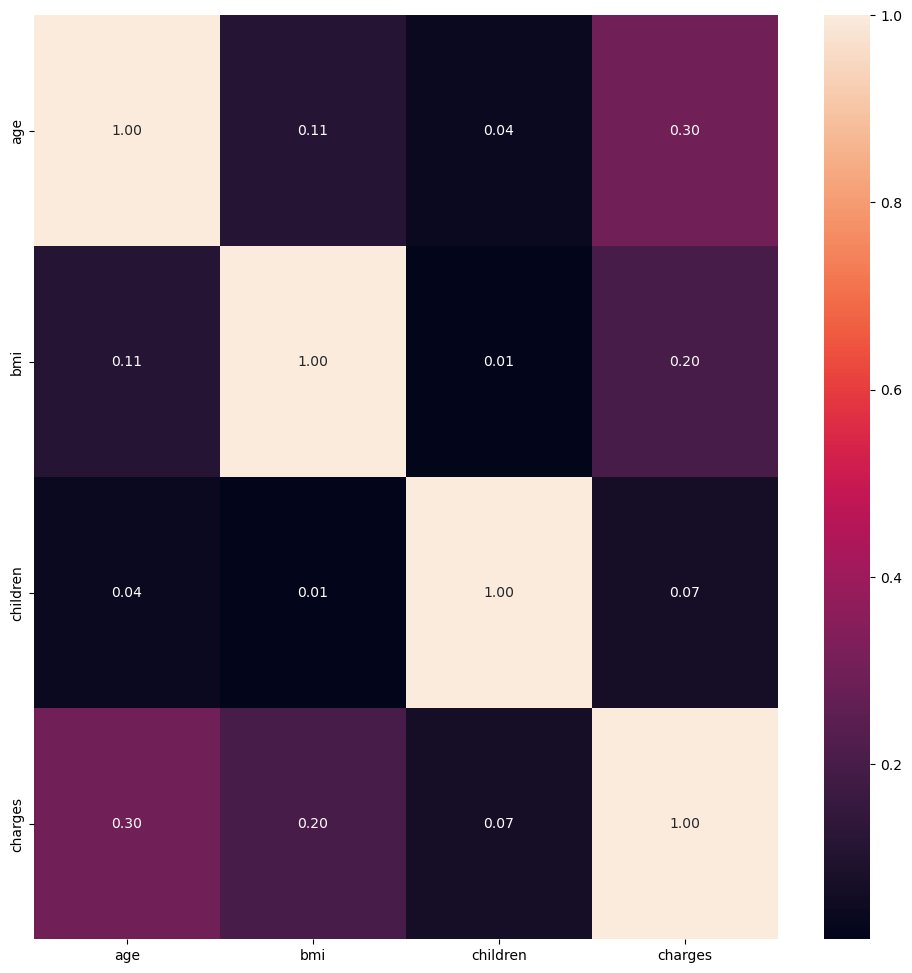

In [8]:
#factor de correlación para el análisis multivariado 
plt.figure(figsize=(12,12))
sb.heatmap(data=data.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

In [9]:
import sklearn
import sklearn.preprocessing
categorical_cols = data.select_dtypes(include = 'object').columns 
categorical_transformer = sklearn.compose.make_column_transformer((sklearn.preprocessing.OrdinalEncoder(), categorical_cols), remainder = 'passthrough')
categorical_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['sex', 'smoker', 'region'], dtype='object'))])

In [10]:
data_transformed = pd.DataFrame(categorical_transformer.fit_transform(data),
                                columns = categorical_transformer.get_feature_names_out(),
                                index = data.index).rename(columns = lambda x: x.removeprefix('ordinalencoder__')).rename(columns = lambda x: x.removeprefix('remainder__'))
data_transformed

,sex,smoker,region,age,bmi,children,charges
0,0.0,1.0,3.0,19.0,27.900,0.0,16884.92400
1,1.0,0.0,2.0,18.0,33.770,1.0,1725.55230
2,1.0,0.0,2.0,28.0,33.000,3.0,4449.46200
3,1.0,0.0,1.0,33.0,22.705,0.0,21984.47061
4,1.0,0.0,1.0,32.0,28.880,0.0,3866.85520
...,...,...,...,...,...,...,...
1333,1.0,0.0,1.0,50.0,30.970,3.0,10600.54830
1334,0.0,0.0,0.0,18.0,31.920,0.0,2205.98080
1335,0.0,0.0,2.0,18.0,36.850,0.0,1629.83350
1336,0.0,0.0,3.0,21.0,25.800,0.0,2007.94500


In [11]:
data_transformed.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_col = data_transformed.select_dtypes(include= ['int64', 'float64']).columns.to_list()
cat_col = data_transformed.select_dtypes(include = ['object']).columns.to_list()
num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
cat_transformer = Pipeline(steps = [('encoder', OneHotEncoder())])
preprocessor = ColumnTransformer(transformers= [('num', num_transformer, num_col),
                                                ('cat', cat_transformer, cat_col)],
                                                remainder= 'passthrough')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['sex', 'smoker', 'region', 'age', 'bmi',
                                  'children', 'charges']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 [])])

In [16]:
data_pre = preprocessor.fit_transform(data_transformed)
#cod_cat = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col) #variables categóricas, indica cual es 1 y cual es 0
labels = np.concatenate([num_col, cod_cat])
data_pro = pd.DataFrame(data_pre, columns = labels )
data_pro

NameError: name 'cod_cat' is not defined

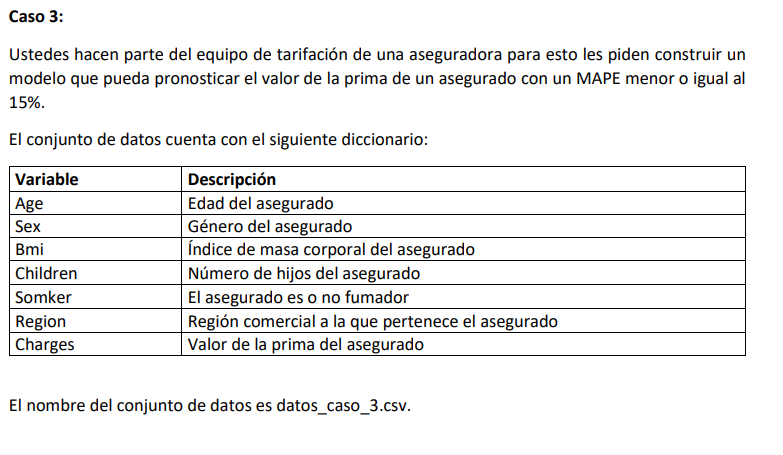
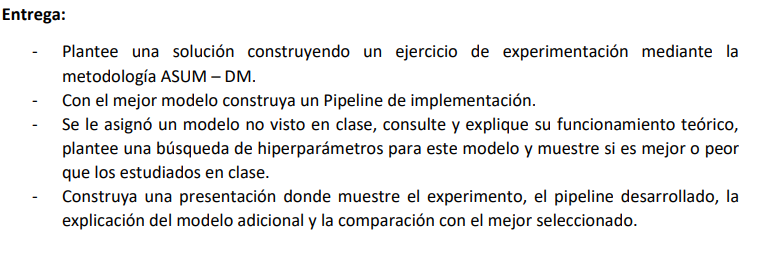